# Обучение модели

Для обучаещего датасета бюли использованы первые 7500 картинок из train_images, для валидации использовал первые 1500 первых картинок из val_images. Для тестового набора использовал 1500 картинок, начиная с 2001 из папки val_images.

Использовалась видеокарта nvidia geforce gtx 1660 super. Процессор intel i9-9900KF. 

## 1. Пробный вариант

Для первой итерации обучения я решил использовать настройки, как у Nvidia. При оценке метрик не использовал дополнительное отсечение по вероятности (использовалось только стандартное по уровню 0.05, вшитое в саму модель).

batch_size = 32

optimizer = torch.optim.SGD(params, lr=2.6e-3, momentum=0.9, nesterov=True)

scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer=optimizer, step_size=15, gamma=0.1, verbose=True
)

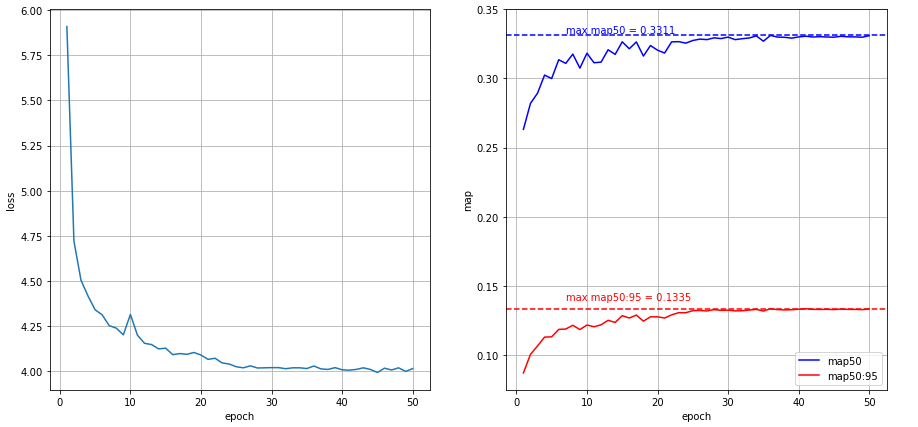

При обучении после, примерно, 5-7 эпох loss застывал примерно на уровне 4.1, метрики возрастали, но крайне медленно. После 25 эпохи модель вышла на плато. \
**На тестовой выборке метрики:**\
***map50 = 0.3430***
***map50:95 = 0.145***


## 2. Оптимизатор sgd + ReduceLROnPlateau

Поменял sheduler на ReduceLROnPlateau - уменьшает шаг обучения если метрика не возрастает 3 эпохи.
batch_size = 32

optimizer = torch.optim.SGD(params, lr=2.6e-3, momentum=0.9, nesterov=True)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=optimizer, patience=4,threshold = 1e-3, verbose=True, factor=0.5, mode = 'max'
)



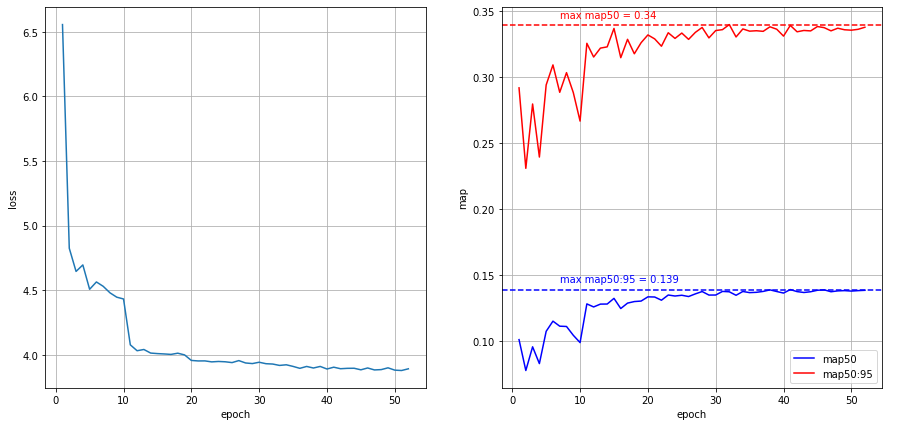

**На тестовой выборке метрики:**\
***map50 = 0.3515***
***map50:95 = 0.146***\
Удалось немного улучшить модель. Дальнейшие эксперименты с sgd особого результата не дали. Далее использую adam.

## 3. Adam


optimizer = torch.optim.Adam(params, lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=optimizer, patience=4,threshold = 1e-3, verbose=True, factor=0.5, mode = 'max'
)

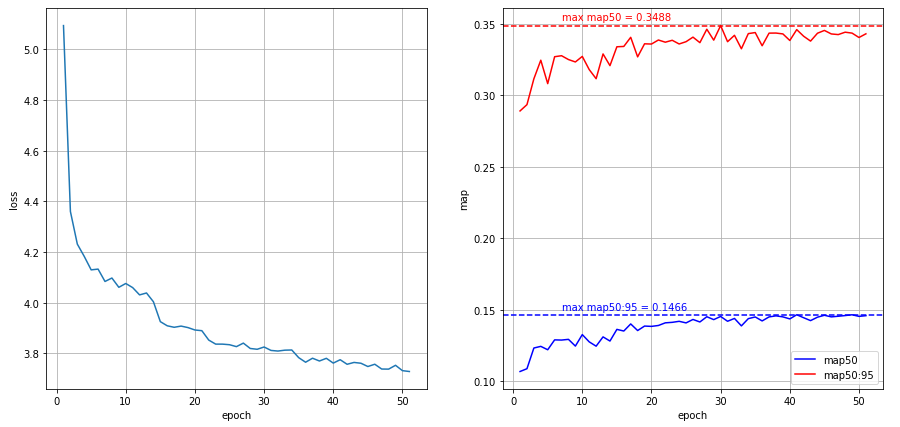




**На тестовой выборке метрики:**\
***map50 = 0.3758***
***map50:95 = 0.1603***\
Удалось снизить loss, а также увеличить метрики. Значения на тесте чуть лучше, чем на val. Другие поптыки с adam показали, что возмонжо повысить map50:95 до 0.15 на val. 


## 4. Adam 100 эпох обучения


optimizer = torch.optim.Adam(params, lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=optimizer, patience=4,threshold = 1e-3, verbose=True, factor=0.5, mode = 'max'
)

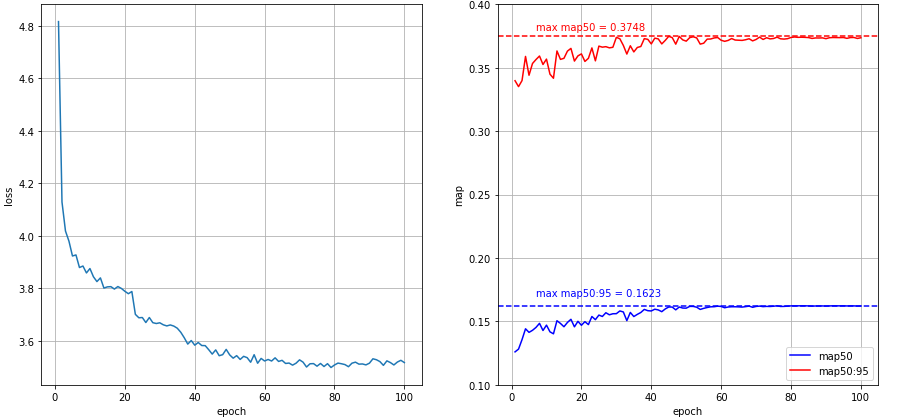

После 60 эпохи метрики и loss менялись незначительно.
Луший результат на 83 эпохе.

**На тестовой выборке метрики:**\
***map50 = 0.3849***
***map50:95 = 0.1682**\
Удалось снизить loss, а также увеличить метрики. **Данную модель буду успользовать как итоговую**